### Data Preprocessing 

In [49]:
fifa

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

      player_positions preferred_foot  international_reputation  weak_foot  \
0           RW, CF, ST           Left                         5          4   
1               ST, LW          Right                         5          4   
2              LW, CAM          Right                         5          5   
3                   GK          Right                         3          3   
4               LW, CF          Right                         4          4   
...                ...            ...                       ...        ...   
18273               CB          Right                         1          3   
18274               CB          Right                  

##### Checking and Handling Missing Values for Numeric Data

In [50]:
# Creating a function to get the columns with missing values

def find_missing(fifa):
    missing_data_cols = fifa.columns[fifa.isnull().sum() > 0]
    null = fifa.isnull().sum()
    null_df = pd.DataFrame(null, columns = ["No_of_null_values"])
    null_df = null_df.loc[missing_data_cols]
    if len(null_df) > 0:
        return null_df
    else:
        return "There are no null values!"

In [51]:
# Splitting the dataset into numerical columns

fifa_num = fifa.select_dtypes('number')

In [52]:
fifa_num

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0         158023   32        170         72       94         94   95500000   
1          20801   34        187         83       93         93   58500000   
2         190871   27        175         68       92         92  105500000   
3         200389   26        188         87       91         93   77500000   
4         183277   28        175         74       91         91   90000000   
...          ...  ...        ...        ...      ...        ...        ...   
18273     245006   22        186         79       48         56      40000   
18274     250995   22        177         66       48         56      40000   
18275     252332   19        186         75       48         56      40000   
18276     251110   18        185         74       48         54      40000   
18277     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
0        565000                         5          4            4   
1        405000                         5          4            5   
2        290000                         5          5            5   
3        125000                         3          3            1   
4        470000                         4          4            4   
...         ...                       ...        ...          ...   
18273      2000                         1          3            2   
18274      2000                         1          2            2   
18275      1000                         1          2            2   
18276      1000                         1          2            2   
18277      2000                         1          3            2   

       release_clause_eur  team_jersey_number  contract_valid_until  \
0             195800000.0                10.0                2021.0   
1              96500000.0                 7.0                2022.0   
2             195200000.0                10.0                2022.0   
3             164700000.0                13.0                2023.0   
4             184500000.0                 7.0                2024.0   
...                   ...                 ...                   ...   
18273             70000.0                36.0                2019.0   
18274             72000.0                31.0                2022.0   
18275             70000.0                38.0                2019.0   
18276             70000.0                33.0                2022.0   
18277                 NaN                37.0                2019.0   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                       NaN  87.0      92.0     92.0       96.0       39.0   
1                       7.0  90.0      93.0     82.0       89.0       35.0   
2                      10.0  91.0      85.0     87.0       95.0       32.0   
3                       1.0   NaN       NaN      NaN        NaN        NaN   
4                      10.0  91.0      83.0     86.0       94.0       35.0   
...                     ...   ...       ...      ...        ...        ...   
18273                   NaN  57.0      23.0     28.0       33.0       47.0   
18274                   NaN  58.0      24.0     33.0       35.0       48.0   
18275                   NaN  54.0      35.0     44.0       45.0       48.0   
18276                   NaN  59.0      35.0     47.0       47.0       45.0   
18277                   NaN  60.0      32.0     51.0       45.0       47.0   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0        66.0        NaN          NaN         NaN          NaN       NaN   
1        78.0        NaN          NaN         NaN          NaN       NaN   
2        58.0        NaN          NaN         NaN          NaN       NaN   
3         NaN       87.0         92.0        78.0         89.0      52.0   
4        66.0        NaN          NaN         NaN          NaN       Na

In [53]:
# Calling 'find_missing' function to get the columns with missing values

find_missing(fifa_num)

No_of_null_values
release_clause_eur                 1298
team_jersey_number                  240
contract_valid_until                240
nation_jersey_number              17152
pace                               2036
shooting                           2036
passing                            2036
dribbling                          2036
defending                          2036
physic                             2036
gk_diving                         16242
gk_handling                       16242
gk_kicking                        16242
gk_reflexes                       16242
gk_speed                          16242
gk_positioning                    16242

**There are number of columns that have missing values which can be imputed from other columns values.**

In [54]:
# Imputing the missing values of nation_jersey_number with team_jersey_number and rename the column as jersey_number

fifa["nation_jersey_number"] = fifa["nation_jersey_number"].fillna(fifa["team_jersey_number"])
fifa = fifa.rename(columns = {"nation_jersey_number":"jersey_number"})

# Imputing the release_clause_eur missing values with the median

fifa['release_clause_eur'] = fifa['release_clause_eur'].fillna(fifa['release_clause_eur'].median())

# Imputing missing values of features for goalkeepers from other similiar features

fifa["pace"] = fifa["pace"].fillna(fifa["gk_speed"])
fifa["shooting"] = fifa["shooting"].fillna(fifa["gk_kicking"])
fifa["physic"] = fifa["physic"].fillna(fifa["gk_handling"])
fifa["defending"] = fifa["defending"].fillna(fifa["gk_reflexes"])
fifa["passing"] = fifa["passing"].fillna(fifa["gk_positioning"])
fifa["dribbling"] = fifa["dribbling"].fillna(fifa["gk_diving"])

##### Dropping Unwanted columns from Numerical features

In [55]:
fifa = fifa.drop(['sofifa_id','contract_valid_until','team_jersey_number','gk_diving','gk_handling','gk_kicking',
                  'gk_reflexes','gk_speed','gk_positioning'], axis = 1)

In [56]:
fifa_num = fifa.select_dtypes('number')

In [57]:
# Rechecking for missing values after handling

find_missing(fifa_num)

'There are no null values!'

In [58]:
fifa_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   overall                     18278 non-null  int64  
 4   potential                   18278 non-null  int64  
 5   value_eur                   18278 non-null  int64  
 6   wage_eur                    18278 non-null  int64  
 7   international_reputation    18278 non-null  int64  
 8   weak_foot                   18278 non-null  int64  
 9   skill_moves                 18278 non-null  int64  
 10  release_clause_eur          18278 non-null  float64
 11  jersey_number               18278 non-null  float64
 12  pace                        18278 non-null  float64
 13  shooting                    182

In [59]:
fifa_num.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur  international_reputation     weak_foot  \
count  1.827800e+04   18278.000000              18278.000000  18278.000000   
mean   2.484038e+06    9456.942773                  1.103184      2.944250   
std    5.585481e+06   21351.714095                  0.378861      0.664656   
min    0.000000e+00       0.000000                  1.000000      1.000000   
25%    3.250000e+05    1000.000000                  1.000000      3.000000   
50%    7.000000e+05    3000.000000                  1.000000      3.000000   
75%    2.100000e+06    8000.000000                  1.000000      3.000000   
max    1.055000e+08  565000.000000                  5.000000      5.000000   

        skill_moves  release_clause_eur  jersey_number          pace  \
count  18278.000000        1.827800e+04   18278.000000  18278.000000   
mean       2.368038        4.489276e+06      19.804464     64.370062   
std        0.765038        1.066997e+07      16.354764     14.646484   
min        1.000000        1.300000e+04       1.000000     12.000000   
25%        2.000000        5.960000e+05       8.000000     57.000000   
50%        2.000000        1.200000e+06      17.000000     67.000000   
75%        3.000000        3.200000e+06      26.000000     74.000000   
max        5.000000        1.958000e+08      99.000000     96.000000   

           shooting       passing     dribbling     defending        physic  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      53.360324     57.917825     62.853594     53.206204     64.683937   
std       13.790503     10.389200     10.074109     16.393964      9.528282   
min       15.000000     24.000000     23.000000     15.000000     27.000000   
25%       44.000000     51.000000     58.000000     39.000000     59.000000   
50%       56.000000     59.000000     64.000000     58.000000     66.000000   
75%       64.000000     65.000000     69.000000     66.000000     72.000000   
max       93.000000     92.000000     96.000000     92.000000     92.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000         18278.000000                18278.000000   
mean            49.718405            45.590218                   52.221468   
std             18.325403            19.594609                   17.428429   
min              5.000000             2.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   56.000000   
75%             64.000000            62.000000                   64.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             18278.000000       18278.000000     18278.000000   
mean                 58.748003          42.809388        55.596509   
std                  14.679653          17.701815        18.929118   
min                   7.000000           3.000000         4.000000   
25%                  54.000000          30.000000        50.000000   
50%                  62.000000          44.000000        61.000000   
75%                  68.000000          56.0000

##### Checking and Handling Missing Values for Categorical Data

In [60]:
fifa_cat = fifa.select_dtypes('object')

In [61]:
find_missing(fifa_cat)

No_of_null_values
player_tags                  16779
team_position                  240
loaned_from                  17230
joined                        1288
nation_position              17152
player_traits                10712
ls                            2036
st                            2036
rs                            2036
lw                            2036
lf                            2036
cf                            2036
rf                            2036
rw                            2036
lam                           2036
cam                           2036
ram                           2036
lm                            2036
lcm                           2036
cm                            2036
rcm                           2036
rm                            2036
lwb                           2036
ldm                           2036
cdm                           2036
rdm                           2036
rwb                           2036
lb                            2036
lcb                           2036
cb                            2036
rcb                           2036
rb                            2036

In [62]:
# Imputing the null values of nation_postion feature from team_position feature

fifa['team_position'].fillna(fifa['nation_position'], inplace = True)

##### Dropping Unwanted columns from Categorical features

In [63]:
fifa = fifa.drop(['player_tags','loaned_from','joined','nation_position','player_traits'], axis = 1)

**Note:**
- There are various position names in our dataset that contains values that signifies how the overall and potential rating of the player is based on that position.
- However there are some missing values in these position name features. Upon further inspection, we find that the null values of these positions are players who are goalkeepers so they do not play in these positions; as such we have decided to fill these missing values with 0

In [64]:
positions = ["ls", "st", "rs", "lw", "lf", "cf", "rf", "rw", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", 
             "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb"]

for i in positions:
    fifa[i] = fifa[i].fillna(0)

In [65]:
fifa_cat = fifa.select_dtypes('object')

In [66]:
fifa_cat

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name         dob nationality  \
0           Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1      Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2            Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                                Jan Oblak  1993-01-07    Slovenia   
4                              Eden Hazard  1991-01-07     Belgium   
...                                    ...         ...         ...   
18273                                   邵帅  1997-03-10    China PR   
18274                         Mingjie Xiao  1997-01-01    China PR   
18275                                   张威  2000-05-16    China PR   
18276                                  汪海健  2000-08-02    China PR   
18277                                  潘喜明  1993-01-11    China PR   

                                club player_positions preferred_foot  \
0                       FC Barcelona       RW, CF, ST           Left   
1                           Juventus           ST, LW          Right   
2                Paris Saint-Germain          LW, CAM          Right   
3                    Atlético Madrid               GK          Right   
4                        Real Madrid           LW, CF          Right   
...                              ...              ...            ...   
18273               Beijing Renhe FC               CB          Right   
18274               Shanghai SIPG FC               CB          Right   
18275         Hebei China Fortune FC               CM          Right   
18276  Shanghai Greenland Shenhua FC               CM          Right   
18277         Hebei China Fortune FC               CM          Right   

           work_rate   body_type real_face team_position    ls    st    rs  \
0         Medium/Low       Messi       Yes            RW  89+2  89+2  89+2   
1           High/Low  C. Ronaldo       Yes            LW  91+3  91+3  91+3   
2        High/Medium      Neymar       Yes           CAM  84+3  84+3  84+3   
3      Medium/Medium      Normal       Yes            GK     0     0     0   
4        High/Medium      Normal       Yes            LW  83+3  83+3  83+3   
...              ...         ...       ...           ...   ...   ...   ...   
18273    Medium/High      Normal        No           RES  32+2  32+2  32+2   
18274  Medium/Medium      Normal        No           SUB  33+2  33+2  33+2   
18275     Low/Medium        Lean        No           SUB  43+2  43+2  43+2   
18276        Low/Low        Lean        No           SUB  43+2  43+2  43+2   
18277  Medium/Medium      Normal        No           SUB  42+2  42+2  42+2   

         lw    lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm  \
0      93+2  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2   
1      89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3   
2      90+3  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3   
3         0     0     0     0     0     0     0     0     0     0     0     0   
4      89+3  88+3  88+3  88+3  89+3  89+3  89+3  

In [67]:
# Rechecking for missing values after handling

find_missing(fifa_cat)

'There are no null values!'

In [68]:
fifa_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  team_position     18278 non-null  object
 12  ls                18278 non-null  object
 13  st                18278 non-null  object
 14  rs                18278 non-null  object
 15  lw                18278 non-null  object
 16  lf                18278 non-null  object
 17  cf          

In [69]:
fifa_cat.describe()

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face team_position     ls  \
count           18278          18278     18278     18278         18278  18278   
unique              2              9        10         2            29     95   
top             Right  Medium/Medium    Normal        No           SUB      0   
freq            13960           9875     10750     16310          7955   2036   

           st     rs     lw     lf     cf     rf     rw    lam    cam    ram  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique     95     95    108    104    104    104    108    104    104    104   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm    rwb  \
count   18278  18278  18278  18278  18278  18278  18278  18278  18278  18278   
unique    101     89     89     89    101     99     99     99     99     99   
top         0      0      0      0      0      0      0      0      0      0   
freq     2036   2036   2036   2036   2036   2036   2036   2036   2036   2036   

           lb    lcb     cb    rcb     rb  
count   18278  18278  18278  18278  18278  
unique     97    111    111    111     97  
top         0      0      0      0      0  
freq     2036   2036   2036   2036   2036

##### Checking for Outliers

In [70]:
fifa.head(1)

player_url short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name  age         dob  height_cm  weight_kg  \
0  Lionel Andrés Messi Cuccittini   32  1987-06-24        170         72   

  nationality          club  overall  potential  value_eur  wage_eur  \
0   Argentina  FC Barcelona       94         94   95500000    565000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   

   skill_moves   work_rate body_type real_face  release_clause_eur  \
0            4  Medium/Low     Messi       Yes         195800000.0   

  team_position  jersey_number  pace  shooting  passing  dribbling  defending  \
0            RW           10.0  87.0      92.0     92.0       96.0       39.0   

   physic  attacking_crossing  attacking_finishing  \
0    66.0                  88                   95   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   

   mentality_vision  mentality_penalties  mentality_composure  \
0                94                   75                   96   

   defending_marking  defending_standing_tackle  defending_sliding_tackle  \
0                 33                         37                        26   

   goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                   6                    11                   15   

   goalkeeping_positioning  goalkeeping_reflexes    ls    st    rs    lw  \
0                       14                     8  89+2  89+2  89+2  93+2   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2

In [71]:
outliers_col = fifa[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
                     'pace', 'shooting', 'dribbling', 'defending', 'physic']]

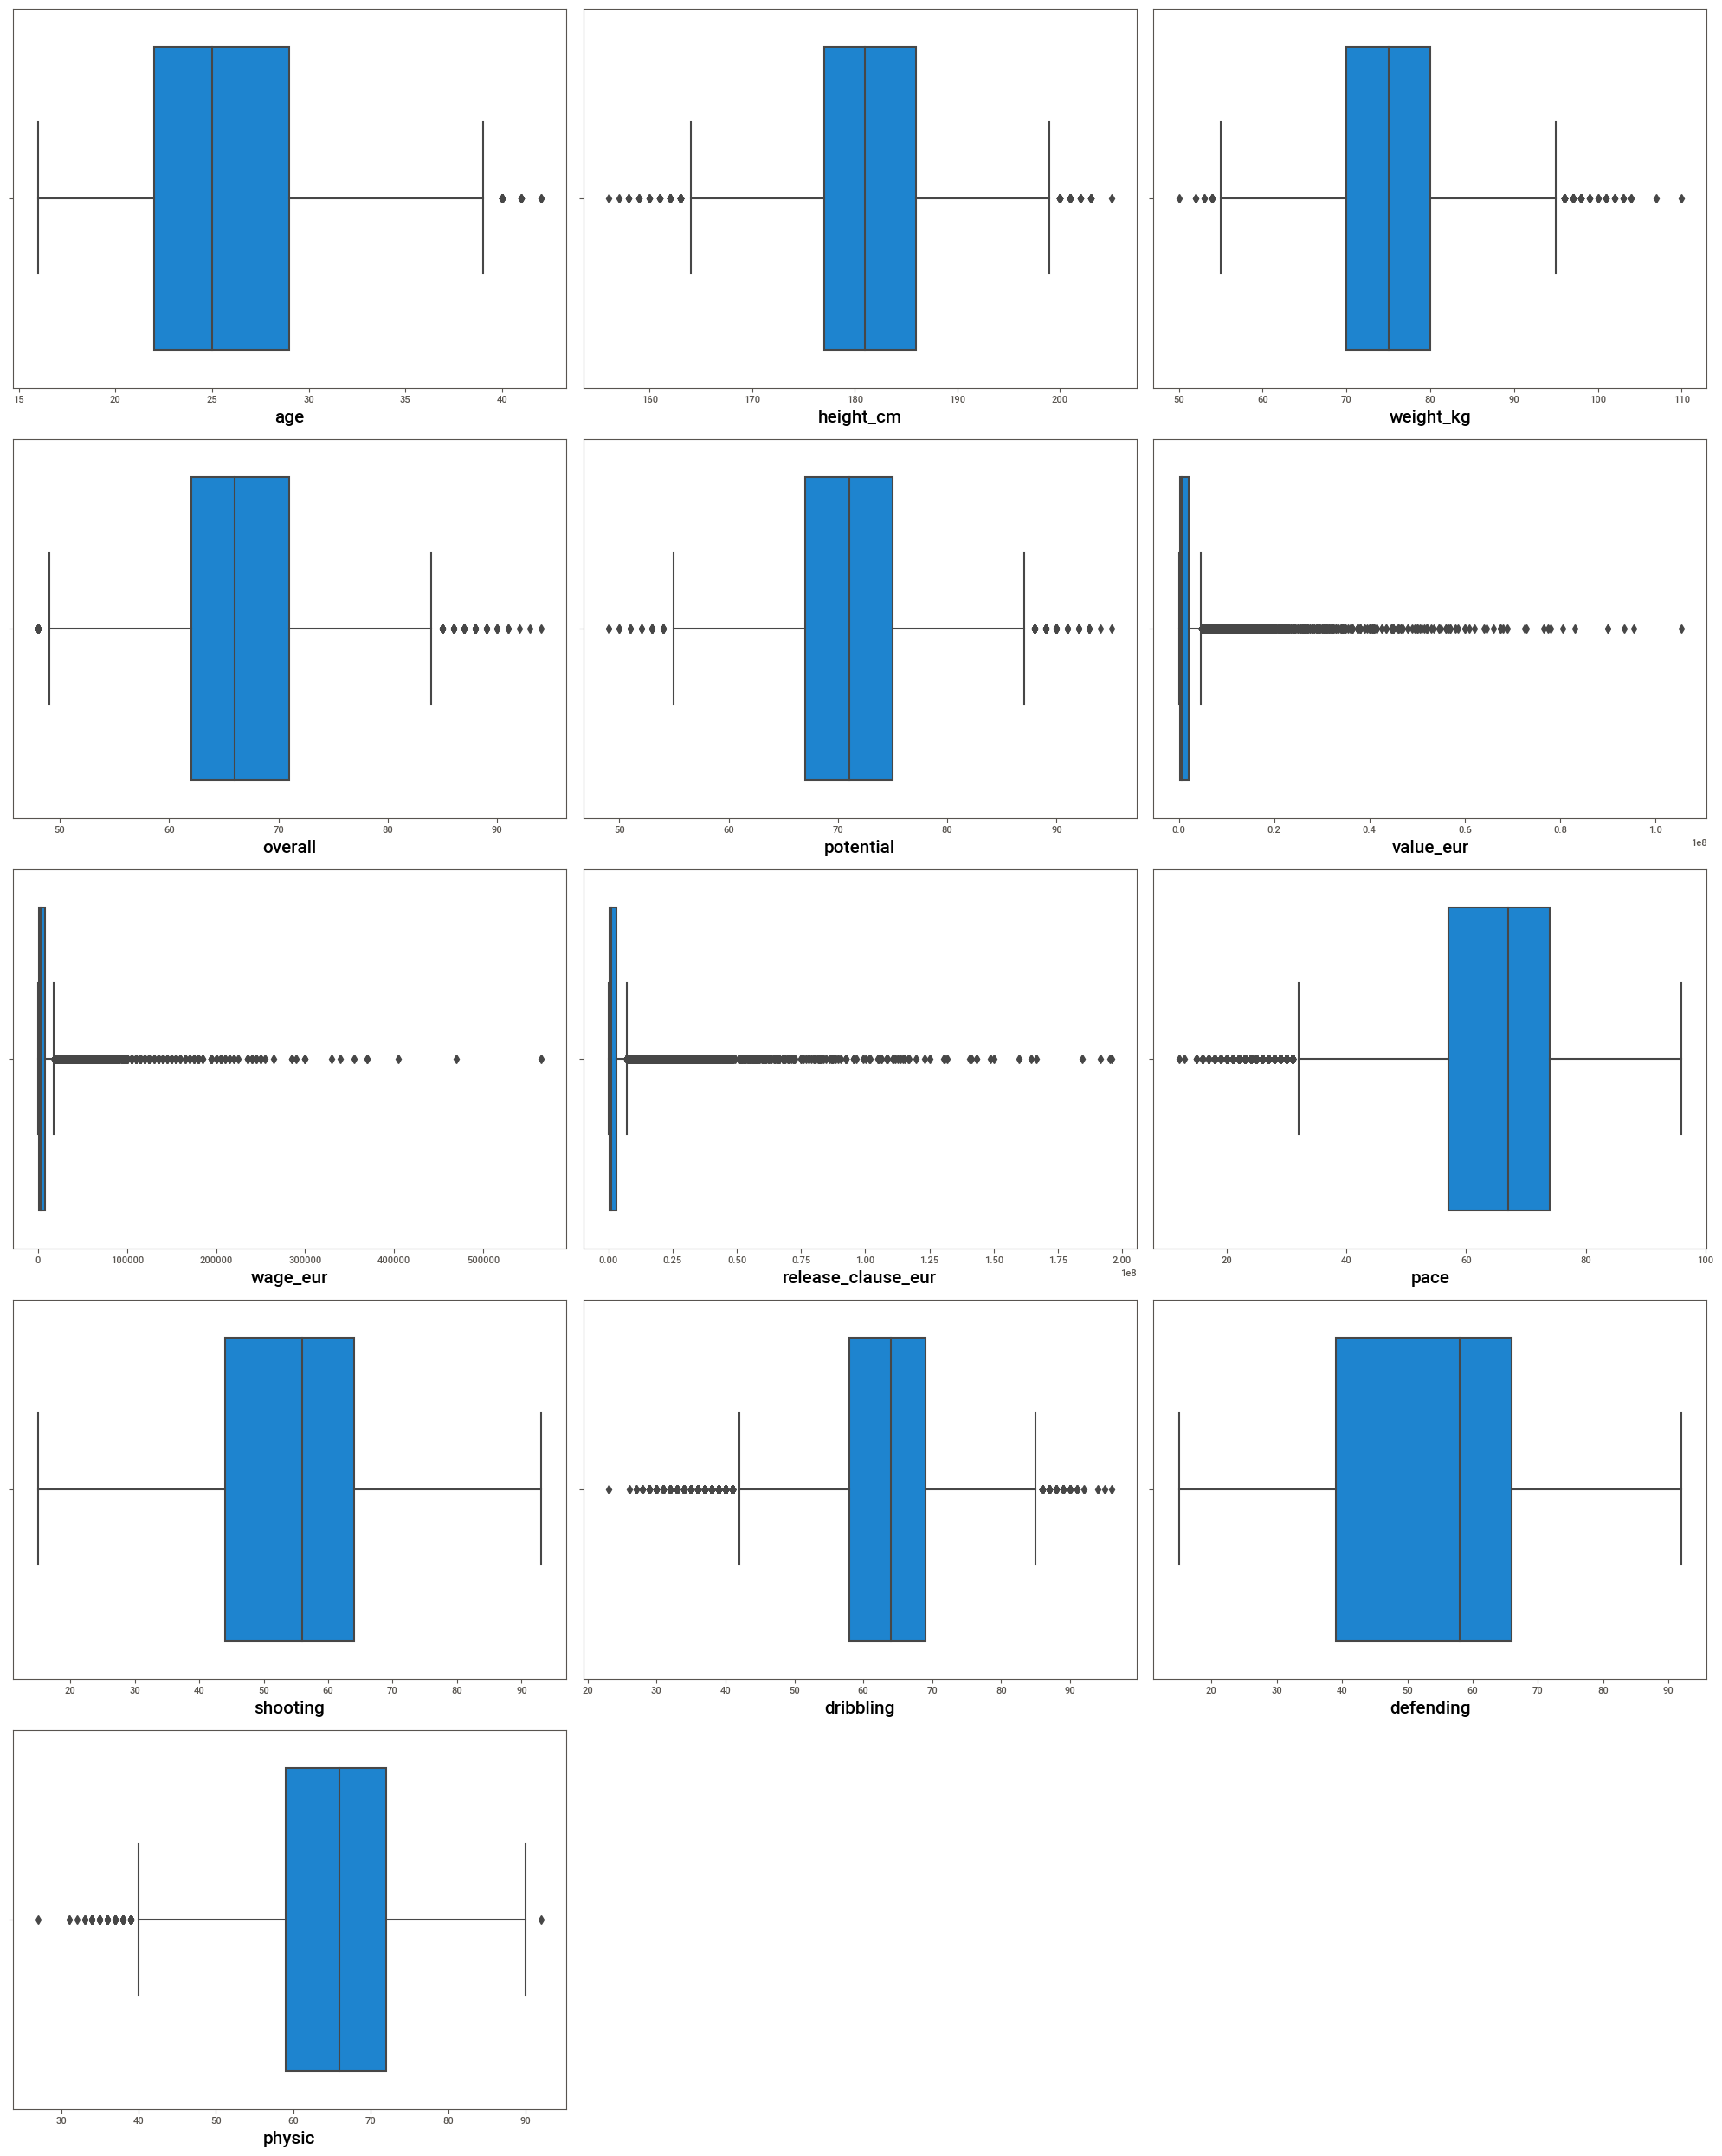

In [72]:
# Box Plot for Above Features

plt.figure(figsize = (20, 25)) 
plotnum = 1
for column in outliers_col:  
    if plotnum <= 16:    
        plt.subplot(5, 3, plotnum) 
        sns.boxplot(x = outliers_col[column])  
        plt.xlabel(column, fontsize = 15) 
    plotnum += 1
    
plt.tight_layout()
plt.show()  

##### Handling Outliers

In [73]:
from scipy import stats

def outlier(data, column):
    iqr = stats.iqr(data[column], interpolation='midpoint')
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    min_limit = q1 - 1.5 * iqr
    max_limit = q3 + 1.5 * iqr
    result = min_limit, max_limit

    outliers = (data[column] < min_limit) | (data[column] > max_limit)
    if outliers.any():
        data[column] = data[column].apply(lambda x: min_limit if x < min_limit else (max_limit if x > max_limit else x))

    return data

In [74]:
columns_to_handle = ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'release_clause_eur',
                     'pace', 'shooting', 'dribbling', 'defending', 'physic']

for column in columns_to_handle:
    outliers_col= outlier(outliers_col, column)

##### Rechecking for Outliers after handling

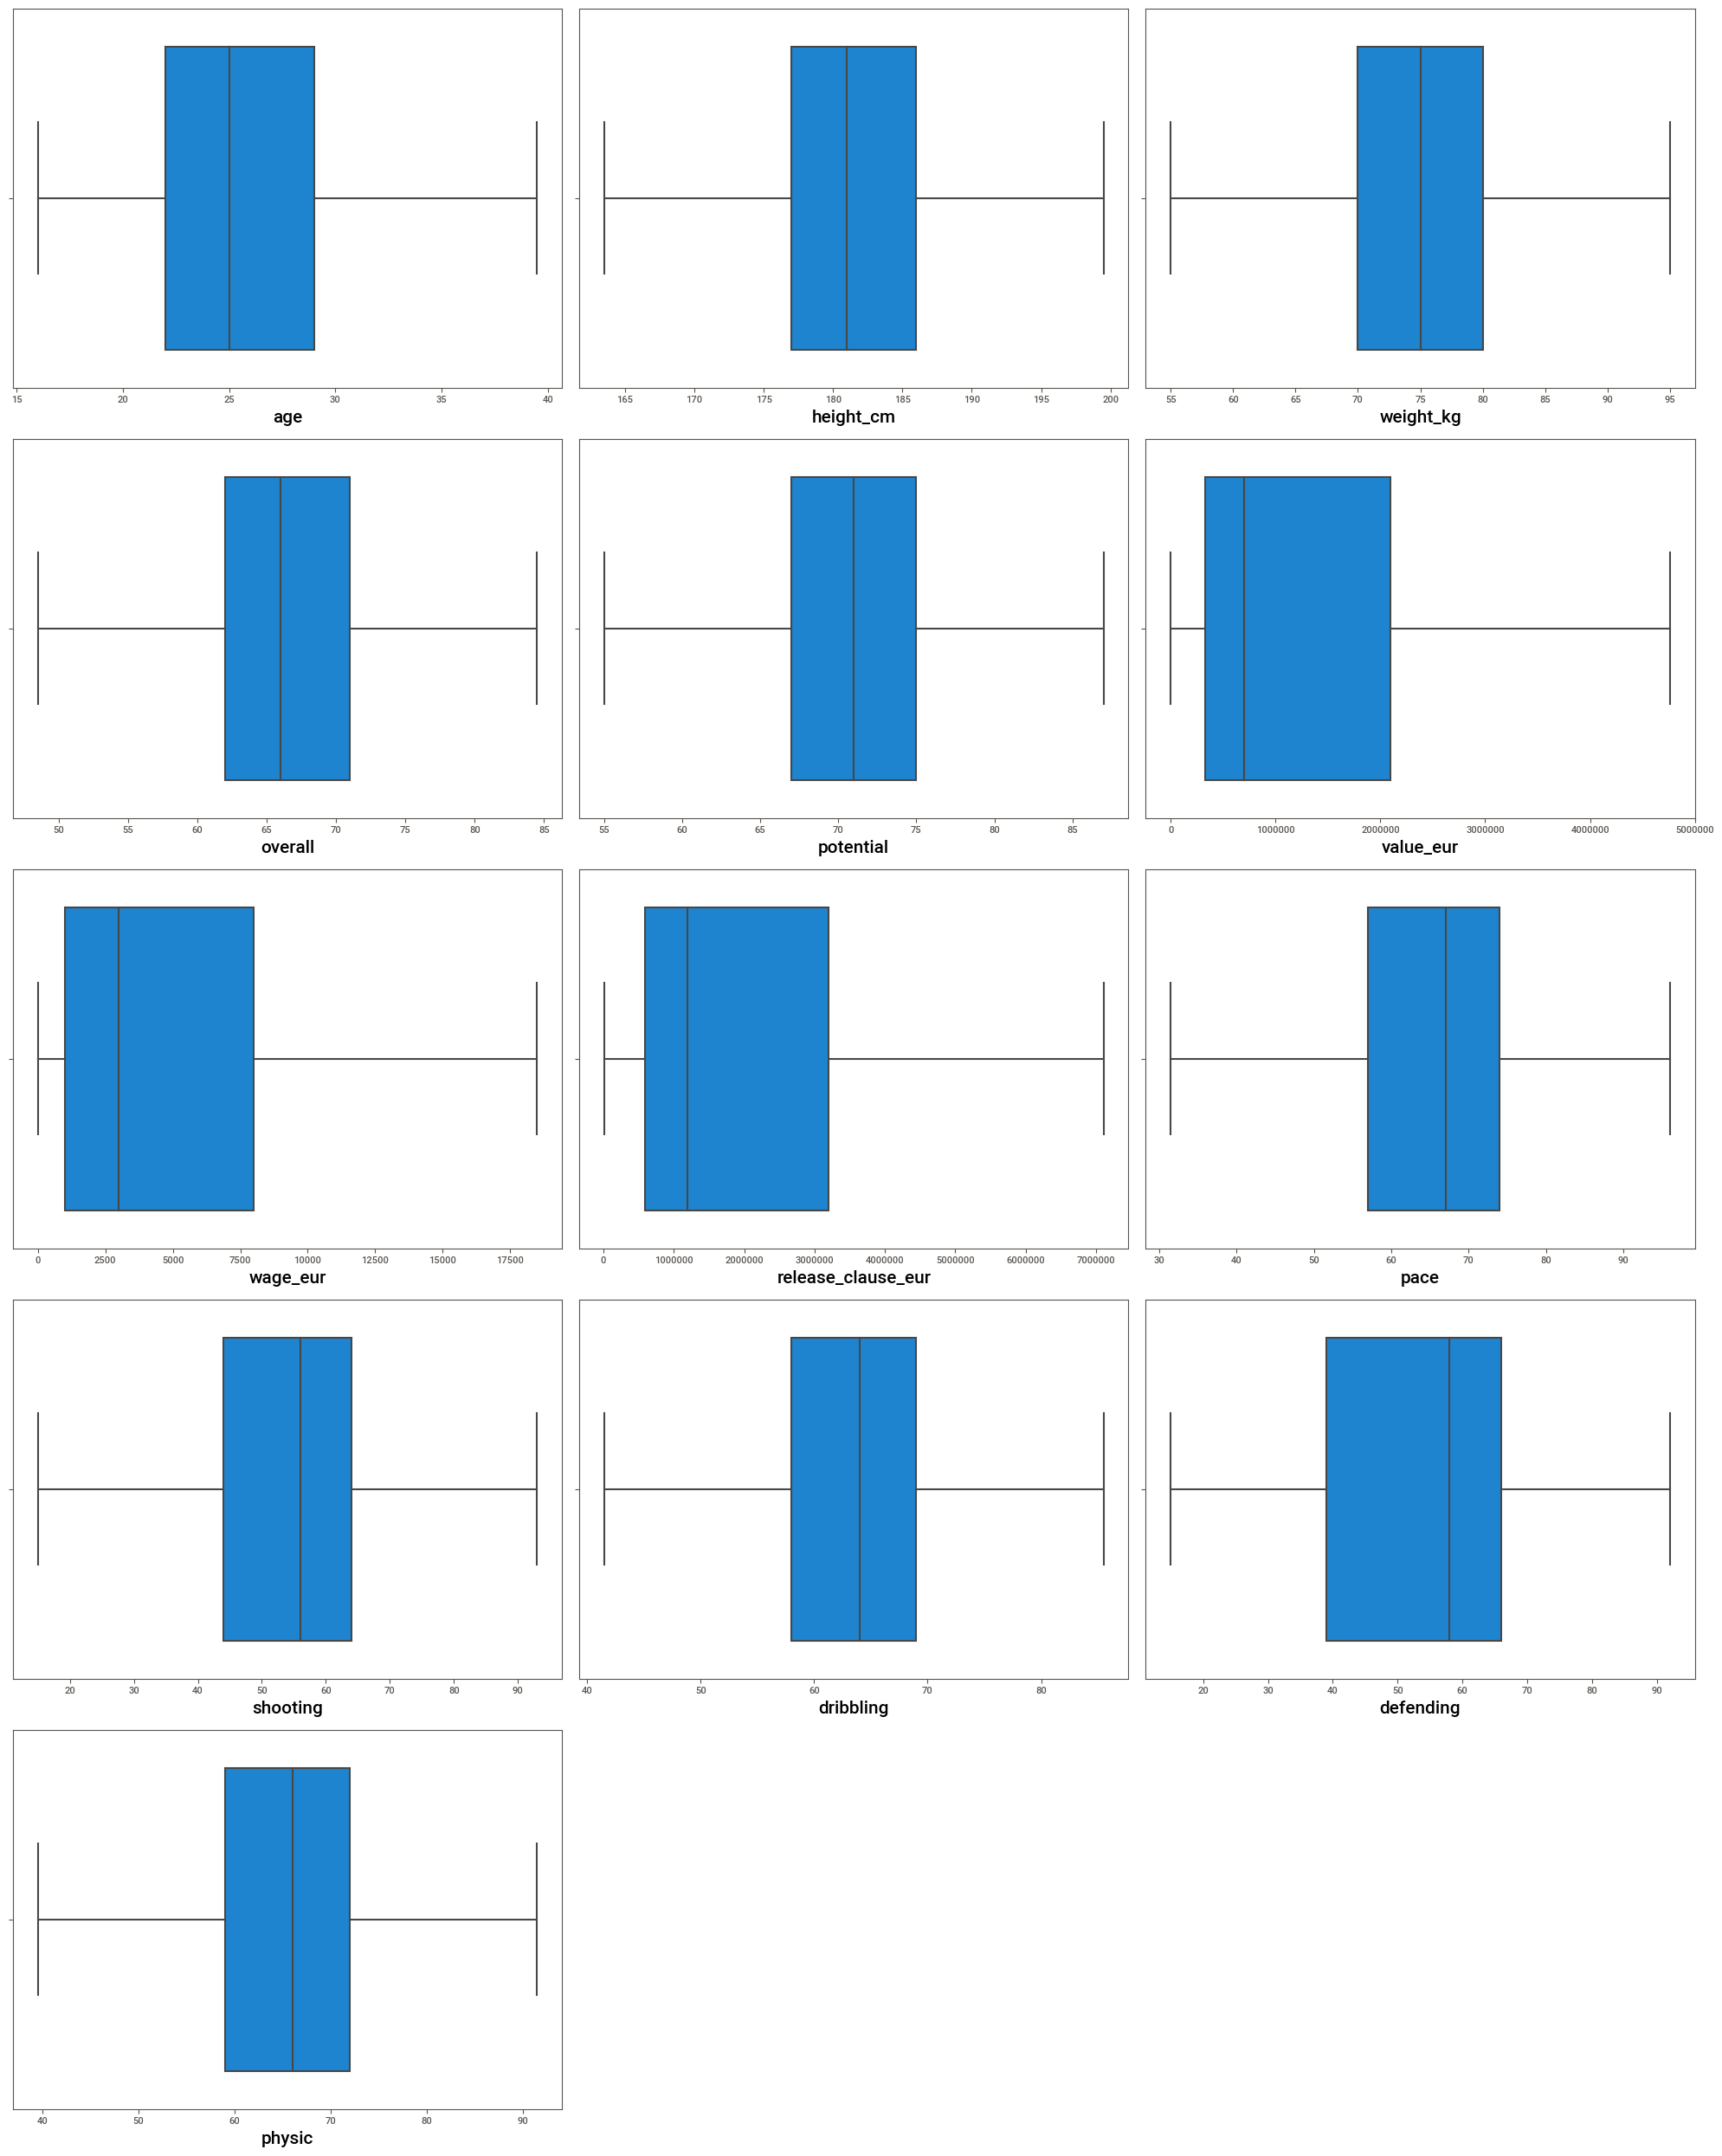

In [75]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in outliers_col:
    plt.subplot(5, 3, plotnumber)
    sns.boxplot(x = column, data = outliers_col)
    plt.xlabel(column, fontsize = 15)
    plotnumber = plotnumber + 1
    
plt.tight_layout()

##### Converting Categorical Features for Positions

In [76]:
# Categorical Columns important features

cat_cols1 = fifa_cat.iloc[:, 4:]
cat_cols1 = pd.concat([cat_cols1, fifa_num['overall']], axis = 1)
cat_cols1.head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type real_face team_position    ls    st    rs    lw  \
0     Medium/Low       Messi       Yes            RW  89+2  89+2  89+2  93+2   
1       High/Low  C. Ronaldo       Yes            LW  91+3  91+3  91+3  89+3   
2    High/Medium      Neymar       Yes           CAM  84+3  84+3  84+3  90+3   
3  Medium/Medium      Normal       Yes            GK     0     0     0     0   
4    High/Medium      Normal       Yes            LW  83+3  83+3  83+3  89+3   

     lf    cf    rf    rw   lam   cam   ram    lm   lcm    cm   rcm    rm  \
0  93+2  93+2  93+2  93+2  93+2  93+2  93+2  92+2  87+2  87+2  87+2  92+2   
1  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3  81+3  88+3   
2  89+3  89+3  89+3  90+3  90+3  90+3  90+3  89+3  82+3  82+3  82+3  89+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  83+3  83+3  83+3  89+3   

    lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  overall  
0  68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2       94  
1  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3       93  
2  66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3       92  
3     0     0     0     0     0     0     0     0     0     0       91  
4  66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3       91

In [77]:
# Define the position columns to split

pos_cols = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm',
            'rwb','lb','lcb','cb','rcb','rb']

# Split the position columns into separate columns for overall and potential ratings

for col in pos_cols:
    cat_cols1[[col+'_overall', col+'_potential']] = cat_cols1[col].str.split('+', expand = True)
    
    # Convert the new columns to numeric data types
    cat_cols1[col+'_overall'] = pd.to_numeric(cat_cols1[col+'_overall'])
    cat_cols1[col+'_potential'] = pd.to_numeric(cat_cols1[col+'_potential'])
    cat_cols1[col+'_potential'] = cat_cols1[col+'_overall'] + cat_cols1[col+'_potential'] 

# Drop the original position columns
cat_cols1.drop(pos_cols, axis = 1, inplace = True)

In [78]:
cat_cols1.head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type real_face team_position  overall  ls_overall  \
0     Medium/Low       Messi       Yes            RW       94        89.0   
1       High/Low  C. Ronaldo       Yes            LW       93        91.0   
2    High/Medium      Neymar       Yes           CAM       92        84.0   
3  Medium/Medium      Normal       Yes            GK       91         NaN   
4    High/Medium      Normal       Yes            LW       91        83.0   

   ls_potential  st_overall  st_potential  rs_overall  rs_potential  \
0          91.0        89.0          91.0        89.0          91.0   
1          94.0        91.0          94.0        91.0          94.0   
2          87.0        84.0          87.0        84.0          87.0   
3           NaN         NaN           NaN         NaN           NaN   
4          86.0        83.0          86.0        83.0          86.0   

   lw_overall  lw_potential  lf_overall  lf_potential  cf_overall  \
0        93.0          95.0        93.0          95.0        93.0   
1        89.0          92.0        90.0          93.0        90.0   
2        90.0          93.0        89.0          92.0        89.0   
3         NaN           NaN         NaN           NaN         NaN   
4        89.0          92.0        88.0          91.0        88.0   

   cf_potential  rf_overall  rf_potential  rw_overall  rw_potential  \
0          95.0        93.0          95.0        93.0          95.0   
1          93.0        90.0          93.0        89.0          92.0   
2          92.0        89.0          92.0        90.0          93.0   
3           NaN         NaN           NaN         NaN           NaN   
4          91.0        88.0          91.0        89.0          92.0   

   lam_overall  lam_potential  cam_overall  cam_potential  ram_overall  \
0         93.0           95.0         93.0           95.0         93.0   
1         88.0           91.0         88.0           91.0         88.0   
2         90.0           93.0         90.0           93.0         90.0   
3          NaN            NaN          NaN            NaN          NaN   
4         89.0           92.0         89.0           92.0         89.0   

   ram_potential  lm_overall  lm_potential  lcm_overall  lcm_potential  \
0           95.0        92.0          94.0         87.0           89.0   
1           91.0        88.0          91.0         81.0           84.0   
2           93.0        89.0          92.0         82.0           85.0   
3            NaN         NaN           NaN          NaN            NaN   
4           92.0        89.0          92.0         83.0           86.0   

   cm_overall  cm_potential  rcm_overall  rcm_potential  rm_overall  \
0        87.0          89.0         87.0           89.0        92.0   
1        81.0          84.0         81.0           84.0        88.0   
2        82.0          85.0         82.0           85.0        89.0   
3         NaN           NaN          NaN            NaN         NaN   
4        83.0          86.0         83.0           86.0        89.0   

   rm_potential  lwb_overall  lwb_potential  ldm_overall  ldm_potential  \
0          94.0         68.0           70.0         66.0           68.0   
1          91.0         65.0           68.0         61.0           64.0   
2          92.0         66.0           69.0         61.0           64.0   
3           NaN          NaN            NaN          NaN            NaN   
4          92.0         66.0           69.0         63.0           66.0   

   cdm_overall  cdm_potential  rdm_overall  rdm_potential  rwb_overall  \
0      

In [79]:
# Filling the Missing values with Median of Overall Rating and Median of Potential Rating

for i in cat_cols1:
    if 'overall' in i:
        cat_cols1[i] = cat_cols1[i].fillna(fifa['overall'].median())
    elif 'potential' in i:
        cat_cols1[i] = cat_cols1[i].fillna(fifa['potential'].median())

In [80]:
# Fixing the 'body_type' feature in the Data set

cat_cols1.body_type.value_counts()

list1 = ['Normal','Lean','Stocky']

for i in cat_cols1['body_type']:
    if i not in list1:
        cat_cols1['body_type'] = cat_cols1['body_type'].replace(i,cat_cols1.body_type.mode().values[0])

In [81]:
find_missing(cat_cols1)

'There are no null values!'

##### Converting the Categorical Columns to Numerical Data using Label Encoder 

In [82]:
cat_cols_le = cat_cols1.copy()

In [83]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns to label encode
le_cols = ['nationality', 'club', 'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 
           'team_position']

# Looping through the categorical columns and apply label encoding

for col in le_cols:
    le = LabelEncoder()
    cat_cols_le[col] = le.fit_transform(cat_cols_le[col].astype(str))

cat_cols_le.head()

nationality  club  player_positions  preferred_foot  work_rate  body_type  \
0            5   224               544               0          7          1   
1          121   350               620               1          1          1   
2           18   462               344               1          2          1   
3          133    63               226               1          8          1   
4           12   505               350               1          2          1   

   real_face  team_position  overall  ls_overall  ls_potential  st_overall  \
0          1             25       94        89.0          91.0        89.0   
1          1             14       93        91.0          94.0        91.0   
2          1              0       92        84.0          87.0        84.0   
3          1              5       91        66.0          71.0        66.0   
4          1             14       91        83.0          86.0        83.0   

   st_potential  rs_overall  rs_potential  lw_overall  lw_potential  \
0          91.0        89.0          91.0        93.0          95.0   
1          94.0        91.0          94.0        89.0          92.0   
2          87.0        84.0          87.0        90.0          93.0   
3          71.0        66.0          71.0        66.0          71.0   
4          86.0        83.0          86.0        89.0          92.0   

   lf_overall  lf_potential  cf_overall  cf_potential  rf_overall  \
0        93.0          95.0        93.0          95.0        93.0   
1        90.0          93.0        90.0          93.0        90.0   
2        89.0          92.0        89.0          92.0        89.0   
3        66.0          71.0        66.0          71.0        66.0   
4        88.0          91.0        88.0          91.0        88.0   

   rf_potential  rw_overall  rw_potential  lam_overall  lam_potential  \
0          95.0        93.0          95.0         93.0           95.0   
1          93.0        89.0          92.0         88.0           91.0   
2          92.0        90.0          93.0         90.0           93.0   
3          71.0        66.0          71.0         66.0           71.0   
4          91.0        89.0          92.0         89.0           92.0   

   cam_overall  cam_potential  ram_overall  ram_potential  lm_overall  \
0         93.0           95.0         93.0           95.0        92.0   
1         88.0           91.0         88.0           91.0        88.0   
2         90.0           93.0         90.0           93.0        89.0   
3         66.0           71.0         66.0           71.0        66.0   
4         89.0           92.0         89.0           92.0        89.0   

   lm_potential  lcm_overall  lcm_potential  cm_overall  cm_potential  \
0          94.0         87.0           89.0        87.0          89.0   
1          91.0         81.0           84.0        81.0          84.0   
2          92.0         82.0           85.0        82.0          85.0   
3          71.0         66.0           71.0        66.0          71.0   
4          92.0         83.0           86.0        83.0          86.0   

   rcm_overall  rcm_potential  rm_overall  rm_potential  lwb_overall  \
0         87.0           89.0        92.0          94.0         68.0   
1         81.0           84.0        88.0          91.0         65.0   
2         82.0           85.0        89.0          92.0         66.0   
3         66.0           71.0        66.0          71.0         66.0   
4         83.0           86.0        89.0          92.0         66.0   

   lwb_potential  ldm_overall  ldm_potential  cdm_overall  cdm_potential  \
0           70.0         66.0           68.0         66.0           68.0   
1           68.0         61.0           64.0         61.0           64.0   
2           69.0         61.0           64.0         61.0           64.0   
3           71.0         66.0           71.0         66.0           71.0   
4           69.0         63.0           66.0         63.0           66.0   

   r

### Feature Engineering

In [84]:
fifa

player_url         short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1      https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2      https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3      https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4      https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   
...                                                  ...                ...   
18273  https://sofifa.com/player/245006/shuai-shao/20...         Shao Shuai   
18274  https://sofifa.com/player/250995/mingjie-xiao/...       Xiao Mingjie   
18275  https://sofifa.com/player/252332/wei-zhang/20/...          Zhang Wei   
18276  https://sofifa.com/player/251110/haijian-wang/...       Wang Haijian   
18277  https://sofifa.com/player/233449/ximing-pan/20...         Pan Ximing   

                                 long_name  age         dob  height_cm  \
0           Lionel Andrés Messi Cuccittini   32  1987-06-24        170   
1      Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05        187   
2            Neymar da Silva Santos Junior   27  1992-02-05        175   
3                                Jan Oblak   26  1993-01-07        188   
4                              Eden Hazard   28  1991-01-07        175   
...                                    ...  ...         ...        ...   
18273                                   邵帅   22  1997-03-10        186   
18274                         Mingjie Xiao   22  1997-01-01        177   
18275                                   张威   19  2000-05-16        186   
18276                                  汪海健   18  2000-08-02        185   
18277                                  潘喜明   26  1993-01-11        182   

       weight_kg nationality                           club  overall  \
0             72   Argentina                   FC Barcelona       94   
1             83    Portugal                       Juventus       93   
2             68      Brazil            Paris Saint-Germain       92   
3             87    Slovenia                Atlético Madrid       91   
4             74     Belgium                    Real Madrid       91   
...          ...         ...                            ...      ...   
18273         79    China PR               Beijing Renhe FC       48   
18274         66    China PR               Shanghai SIPG FC       48   
18275         75    China PR         Hebei China Fortune FC       48   
18276         74    China PR  Shanghai Greenland Shenhua FC       48   
18277         78    China PR         Hebei China Fortune FC       48   

       potential  value_eur  wage_eur player_positions preferred_foot  \
0             94   95500000    565000       RW, CF, ST           Left   
1             93   58500000    405000           ST, LW          Right   
2             92  105500000    290000          LW, CAM          Right   
3             93   77500000    125000               GK          Right   
4             91   90000000    470000           LW, CF          Right   
...          ...        ...       ...              ...            ...   
18273         56      40000      2000               CB          Right   
18274         56      40000      2000               CB          Right   
18275         56      40000      1000               CM          Right   
18276         54      40000      1000               CM          Right   
18277         51      40000      2000               CM          Right   

       international_reputation  weak_foot  skill_moves      work_rate  \
0                             5          4            4     Medium/Low   
1                             5          4            5       High/Low   
2                             5          5            5    High/Medium   
3                             3          3            1  Medium/Medium   
4                             4          4            4    High/Medium   
...                   

##### Plotting Heat Map for Numerical Data

In [85]:
fifa_num.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081391   0.237169  0.464305   
height_cm                   0.081391   1.000000   0.768816  0.039945   
weight_kg                   0.237169   0.768816   1.000000  0.156522   
overall                     0.464305   0.039945   0.156522  1.000000   
potential                  -0.262872  -0.002432  -0.011738  0.646650   
value_eur                   0.081513   0.009527   0.051782  0.638230   
wage_eur                    0.151031   0.019547   0.065946  0.573578   
international_reputation    0.259582   0.037935   0.090854  0.475557   
weak_foot                   0.073988  -0.175200  -0.128568  0.230276   
skill_moves                 0.045277  -0.429980  -0.352060  0.401261   
release_clause_eur          0.067178   0.010800   0.047365  0.609801   
jersey_number              -0.231730  -0.037392  -0.087263 -0.212249   
pace                       -0.151069  -0.522122  -0.462079  0.197109   
shooting                    0.255411  -0.091908   0.002471  0.479533   
passing                     0.358493  -0.168833  -0.069115  0.679281   
dribbling                   0.192475  -0.316445  -0.209633  0.619056   
defending                   0.273846   0.294643   0.292232  0.329762   
physic                      0.427929   0.413953   0.503863  0.553373   
attacking_crossing          0.128189  -0.498103  -0.401643  0.389078   
attacking_finishing         0.078531  -0.376091  -0.291504  0.342372   
attacking_heading_accuracy  0.149946   0.010296   0.039679  0.345784   
attacking_short_passing     0.135681  -0.371445  -0.291090  0.503157   
attacking_volleys           0.143063  -0.351059  -0.260903  0.394152   
skill_dribbling             0.016735  -0.500107  -0.415861  0.370639   
skill_curve                 0.141891  -0.447578  -0.349230  0.415521   
skill_fk_accuracy           0.190419  -0.410071  -0.310277  0.389790   
skill_long_passing          0.184008  -0.335343  -0.259906  0.487289   
skill_ball_control          0.088359  -0.425013  -0.340154  0.457052   
movement_acceleration      -0.153145  -0.558354  -0.493125  0.186320   
movement_sprint_speed      -0.144310  -0.474736  -0.420978  0.199009   
movement_agility           -0.023131  -0.633770  -0.545514  0.253464   
movement_reactions          0.463331  -0.019698   0.090986  0.864526   
movement_balance           -0.089609  -0.789806  -0.669125  0.103872   
power_shot_power            0.261916  -0.174280  -0.055855  0.567504   
power_jumping               0.185964  -0.041149   0.031246  0.267553   
power_stamina               0.115859  -0.291791  -0.219505  0.370344   
power_strength              0.341852   0.535400   0.614334  0.361543   
power_long_shots            0.161616  -0.384213  -0.279097  0.425081   
mentality_aggression        0.260420  -0.045307   0.030643  0.399434   
mentality_interceptions     0.196346  -0.053148  -0.028345  0.315582   
mentality_positioning       0.086503  -0.445302  -0.355329  0.356025   
mentality_vision            0.195372  -0.371546  -0.280242  0.509251   
mentality_penalties         0.141375  -0.335786  -0.246309  0.347950   
mentality_composure         0.370149  -0.159296  -0.054167  0.719992   
defending_marking           0.157007  -0.077038  -0.049683  0.303075   
defending_standing_tackle   0.116857  -0.068334  -0.052770  0.249891   
defending_sliding_tackle    0.101534  -0.076953  -0.064492  0.219560   
goalkeeping_diving          0.110313   0.367433   0.342329 -0.013239   
goalkeeping_handling        0.112929   0.367163   0.343211 -0.013716   
goalkeeping_kicking         0.112615   0.364992   0.339805 -0.017393   
goalkeeping_positioning     0.121381   0.367097   0.344397 -0.006408   
goalkeeping_reflexes        0.111811   0.367375   0.343126 -0.012775   

                            potential  value_eur  wage_eur  \
age                         -0.262872   0.081513  0.151031   
height_cm                   -0.002432   0.009527  0.019547   
weight_kg                   -0

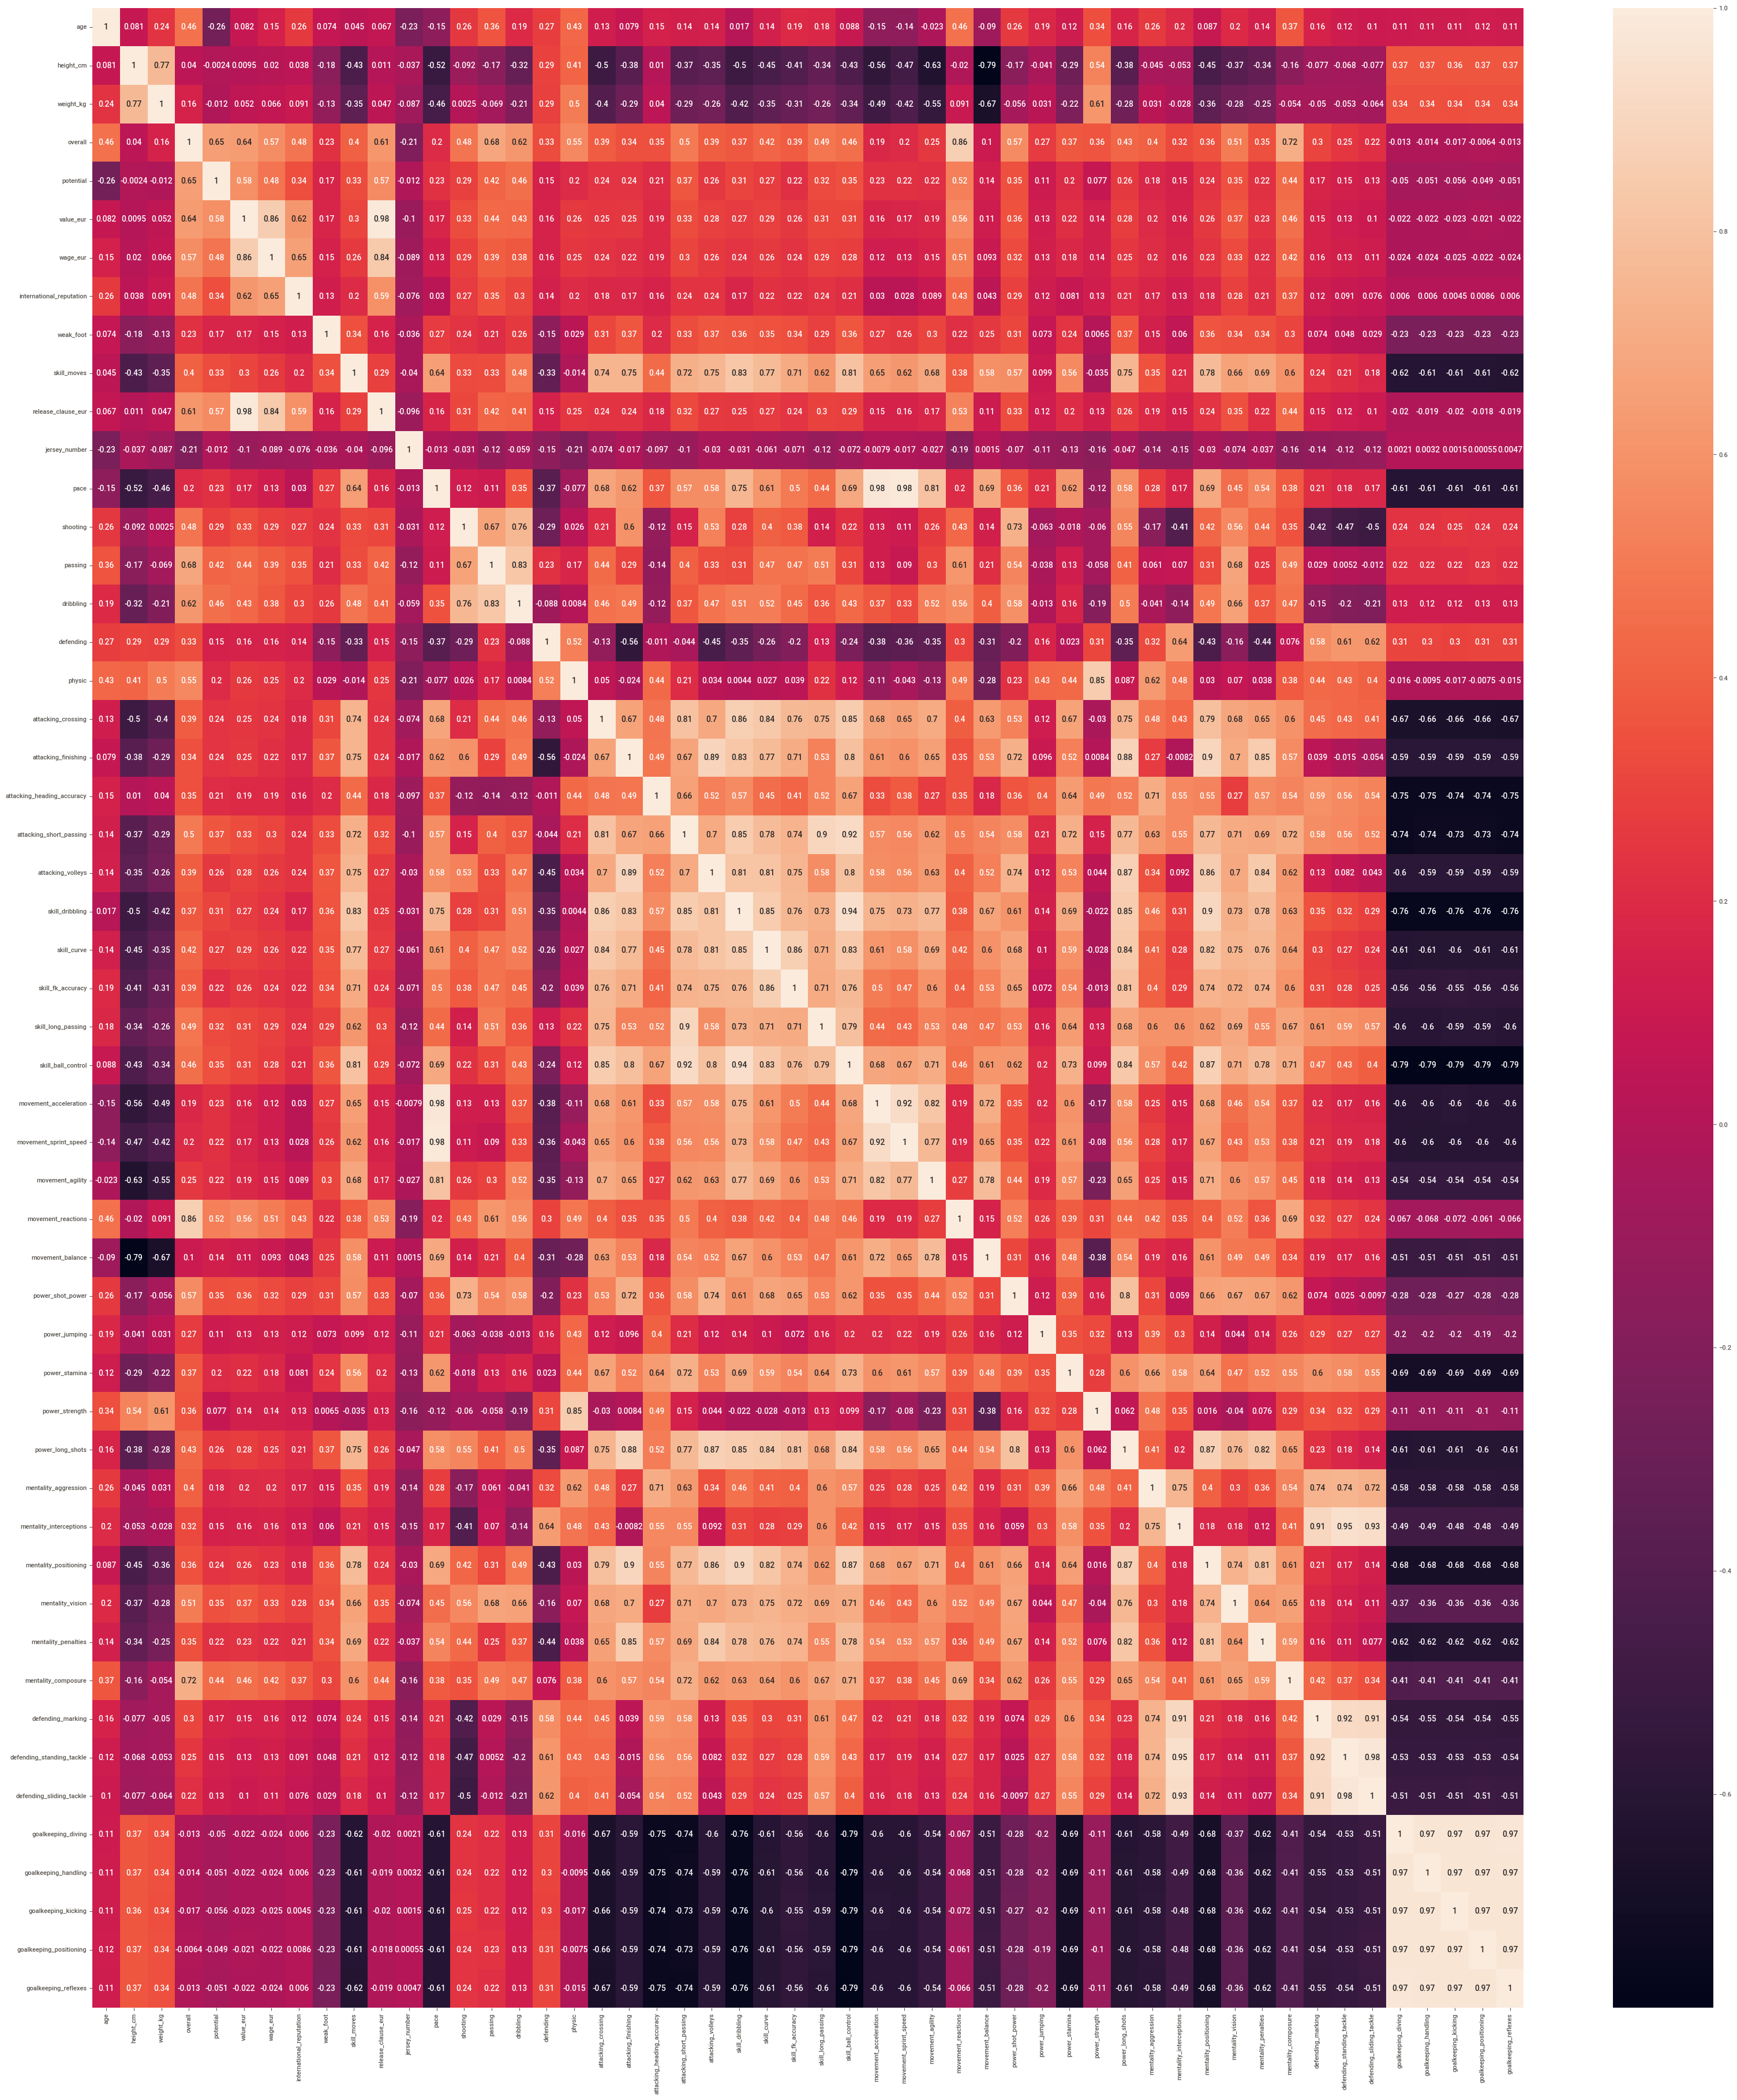

In [86]:
plt.figure(figsize = (40, 45))

sns.heatmap(fifa_num.corr(), annot = True)
plt.show()

**From the above heatmap, it is very difficult to find highly correalted feature so we will find the correlation value to get the highly correlated feature.**

In [87]:
# To get the highly correlated features 

pd.set_option('display.max_rows', None)
corrmat = fifa_num.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending = False)
corrmat = corrmat [corrmat >= 0.90] # Set threshold 0.90
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0       movement_sprint_speed                       pace  0.984141
1                        pace      movement_sprint_speed  0.984141
2                   value_eur         release_clause_eur  0.979233
3          release_clause_eur                  value_eur  0.979233
4                        pace      movement_acceleration  0.976594
5       movement_acceleration                       pace  0.976594
6   defending_standing_tackle   defending_sliding_tackle  0.975808
7    defending_sliding_tackle  defending_standing_tackle  0.975808
8          goalkeeping_diving       goalkeeping_reflexes  0.973922
9        goalkeeping_reflexes         goalkeeping_diving  0.973922
10         goalkeeping_diving       goalkeeping_handling  0.971330
11       goalkeeping_handling         goalkeeping_diving  0.971330
12       goalkeeping_reflexes       goalkeeping_handling  0.971244
13       goalkeeping_handling       goalkeeping_reflexes  0.971244
14    goalkeeping_positioning         goalkeeping_diving  0.971218
15         goalkeeping_diving    goalkeeping_positioning  0.971218
16    goalkeeping_positioning       goalkeeping_reflexes  0.971060
17       goalkeeping_reflexes    goalkeeping_positioning  0.971060
18       goalkeeping_handling    goalkeeping_positioning  0.970517
19    goalkeeping_positioning       goalkeeping_handling  0.970517
20        goalkeeping_kicking       goalkeeping_reflexes  0.967866
21       goalkeeping_reflexes        goalkeeping_kicking  0.967866
22         goalkeeping_diving        goalkeeping_kicking  0.967057
23        goalkeeping_kicking         goalkeeping_diving  0.967057
24       goalkeeping_handling        goalkeeping_kicking  0.966508
25        goalkeeping_kicking       goalkeeping_handling  0.966508
26    goalkeeping_positioning        goalkeeping_kicking  0.966061
27        goalkeeping_kicking    goalkeeping_positioning  0.966061
28    mentality_interceptions  defending_standing_tackle  0.945287
29  defending_standing_tackle    mentality_interceptions  0.945287
30            skill_dribbling         skill_ball_control  0.943461
31         skill_ball_control            skill_dribbling  0.943461
32   defending_sliding_tackle    mentality_interceptions  0.933894
33    mentality_interceptions   defending_sliding_tackle  0.933894
34      movement_sprint_speed      movement_acceleration  0.923721
35      movement_acceleration      movement_sprint_speed  0.923721
36          defending_marking  defending_standing_tackle  0.918593
37  defending_standing_tackle          defending_marking  0.918593
38         skill_ball_control    attacking_short_passing  0.917721
39    attacking_short_passing         skill_ball_control  0.917721
40   defending_sliding_tackle          defending_marking  0.909153
41          defending_marking   defending_sliding_tackle  0.909153
42          defending_marking    mentality_interceptions  0.907401
43    mentality_interceptions          defending_marking  0.907401
44            skill_dribbling      mentality_positioning  0.904501
45      mentality_positioning            skill_dribbling  0.904501

##### Dropping the unimportant features based on high correlation

In [88]:
fifa_num.drop(['release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'], 
          axis = 1, inplace = True)

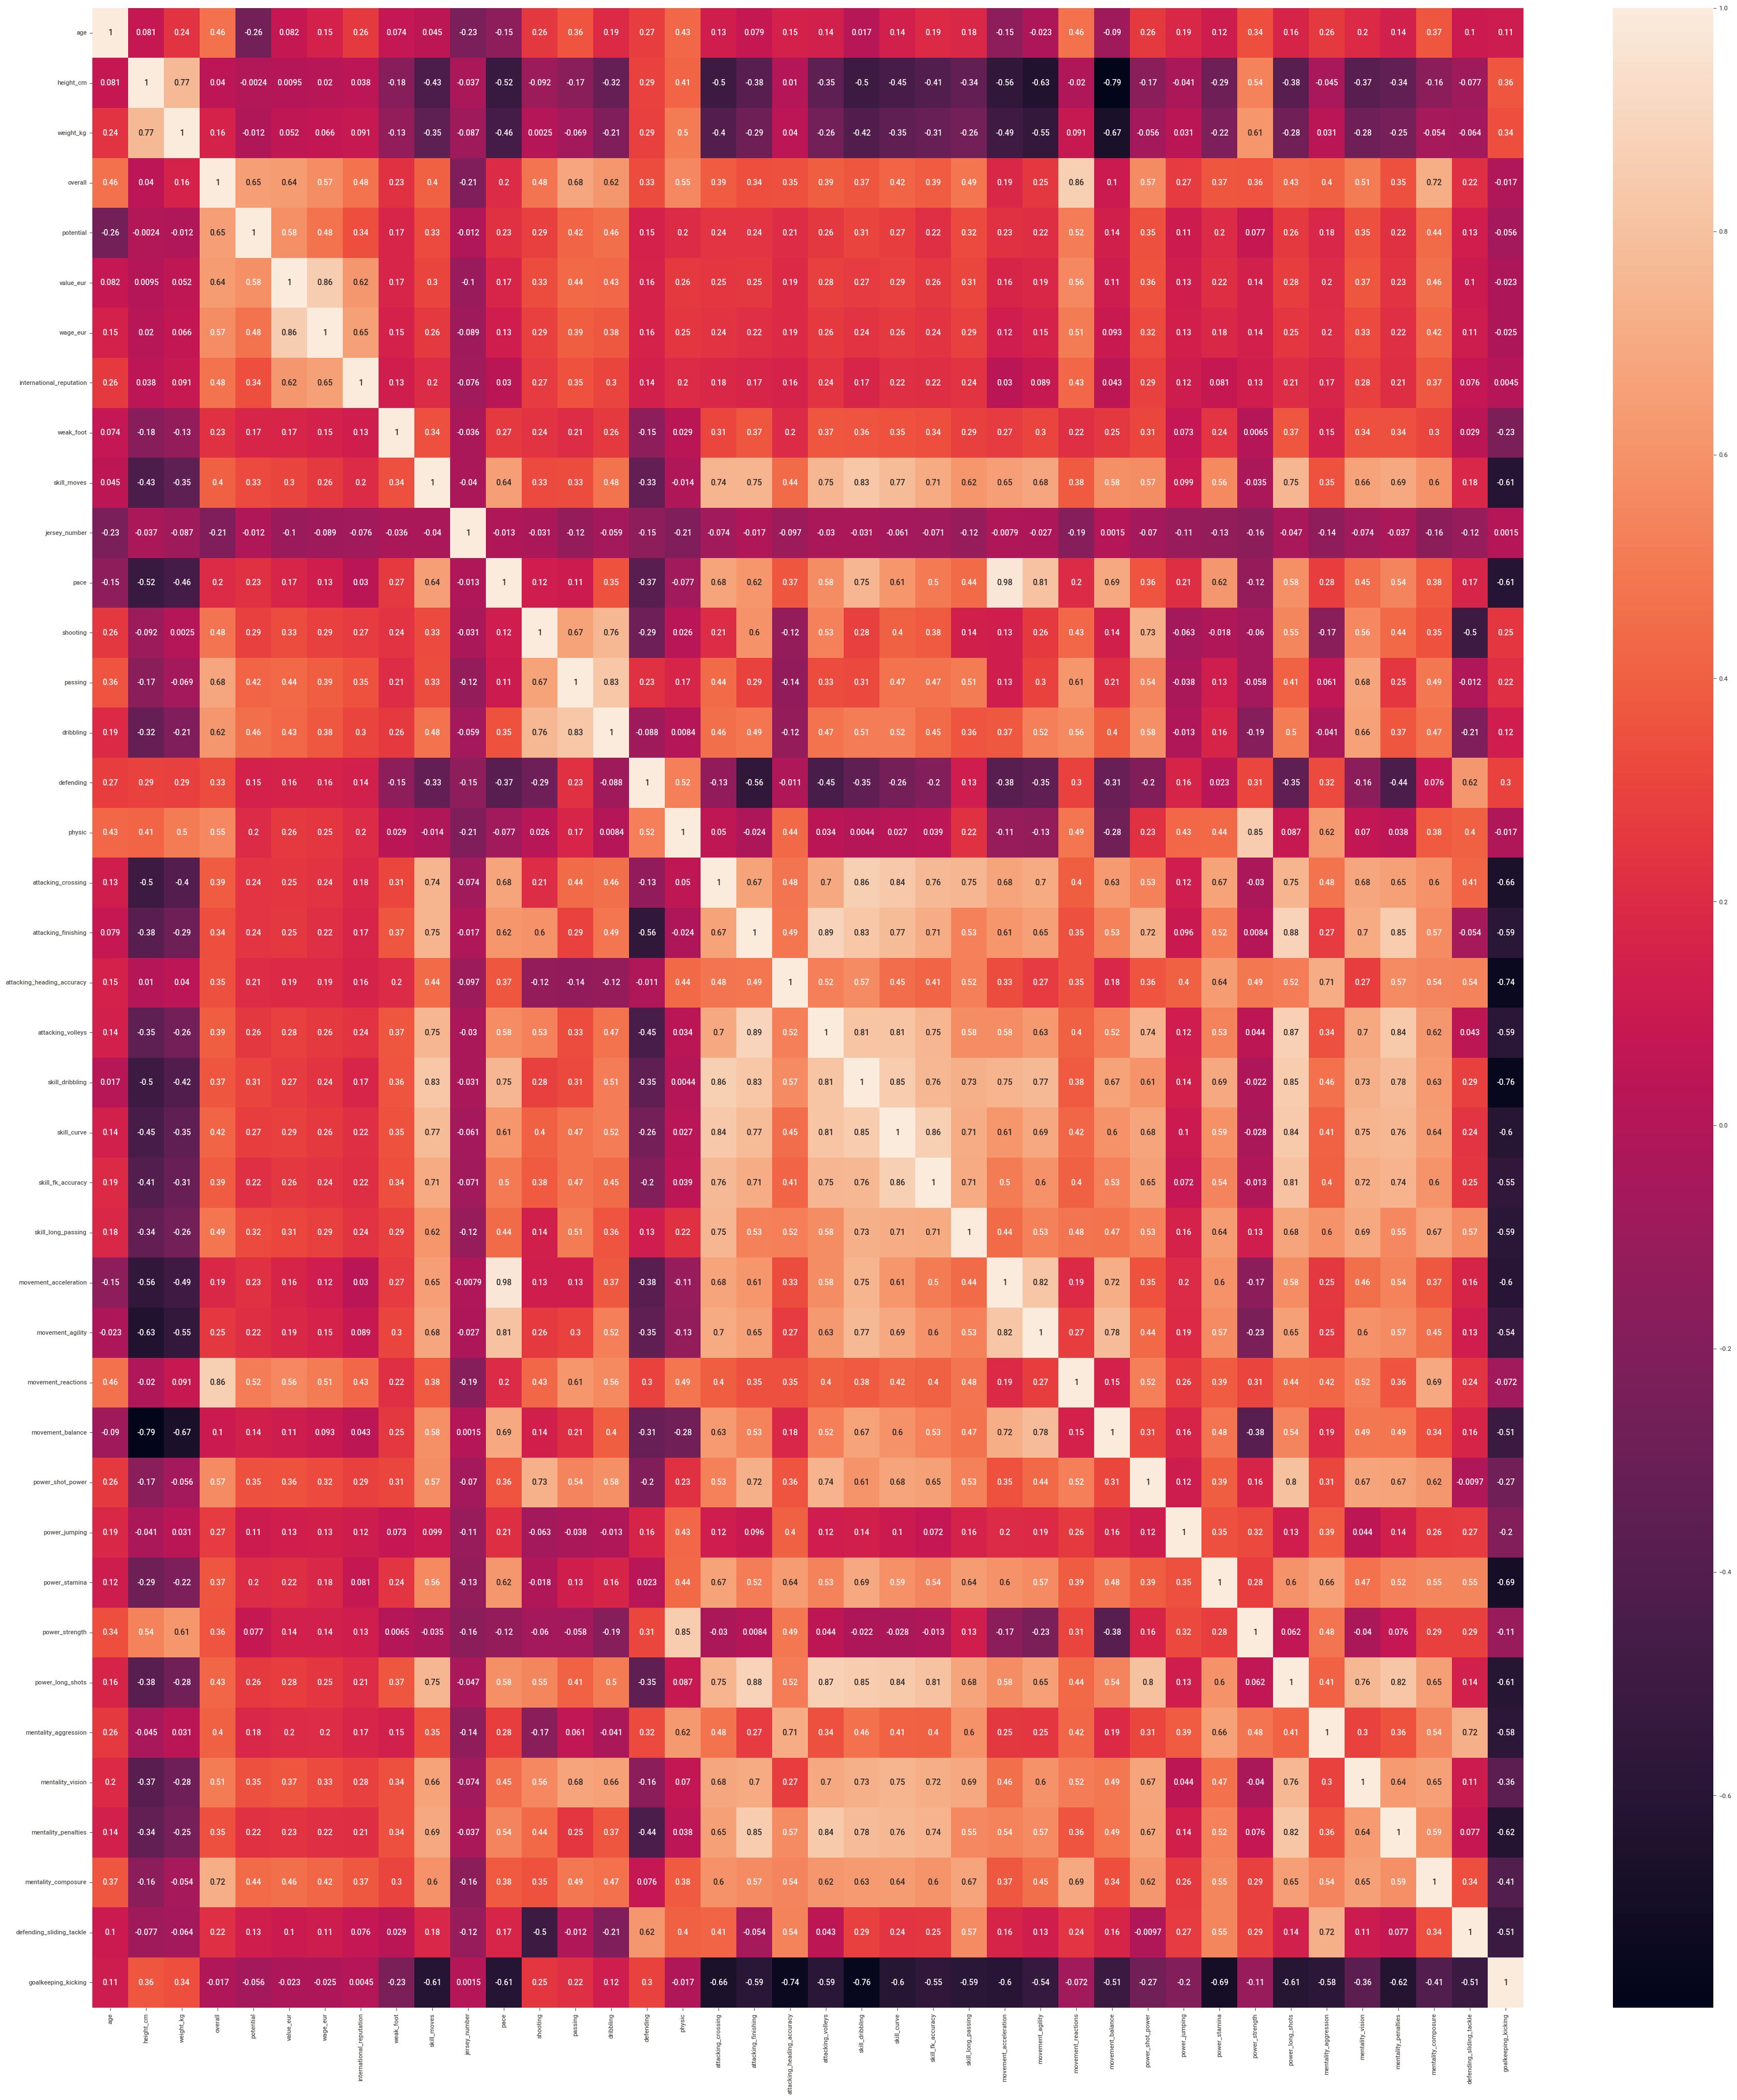

In [89]:
# Plotting Heatmap after handling Highly correlated features

plt.figure(figsize = (40, 45))

sns.heatmap(fifa_num.corr(), annot = True)
plt.show()

##### Checking for Duplicate Data

In [90]:
fifa.duplicated().sum()

0

**Observation:**
- No duplicate data

##### Concatenating fifa_num and cat_cols_le

In [91]:
comp_fifa = pd.concat([fifa_num, cat_cols_le], axis = 1)
comp_fifa.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0   32        170         72       94         94   95500000    565000   
1   34        187         83       93         93   58500000    405000   
2   27        175         68       92         92  105500000    290000   
3   26        188         87       91         93   77500000    125000   
4   28        175         74       91         91   90000000    470000   

   international_reputation  weak_foot  skill_moves  jersey_number  pace  \
0                         5          4            4           10.0  87.0   
1                         5          4            5            7.0  90.0   
2                         5          5            5           10.0  91.0   
3                         3          3            1            1.0  52.0   
4                         4          4            4           10.0  91.0   

   shooting  passing  dribbling  defending  physic  attacking_crossing  \
0      92.0     92.0       96.0       39.0    66.0                  88   
1      93.0     82.0       89.0       35.0    78.0                  84   
2      85.0     87.0       95.0       32.0    58.0                  87   
3      78.0     90.0       87.0       89.0    92.0                  13   
4      83.0     86.0       94.0       35.0    66.0                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_volleys  \
0                   95                          70                 88   
1                   94                          89                 87   
2                   87                          62                 87   
3                   11                          15                 13   
4                   84                          61                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   movement_acceleration  movement_agility  movement_reactions  \
0                     91                93                  95   
1                     89                87                  96   
2                     94                96                  92   
3                     43                67                  88   
4                     94                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  mentality_vision  \
0              68                94                    48                94   
1              78                93                    63                82   
2              49                84                    51                90   
3              78                12                    34                65   
4              63                80                    54                89   

   mentality_penalties  mentality_composure  defending_sliding_tackle  \
0                   75                   96                        26   
1                   85                   95                        24   
2                   90                   94                        29   
3                   11                   68                        18   
4                   88                   91                        22   

   goalkeeping_kicking  nationality  clu

##### Scaling of Data

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

fifa_scaled = sc.fit_transform(comp_fifa)

In [93]:
fifa_processed_df = pd.DataFrame(fifa_scaled, columns = comp_fifa.columns)
fifa_processed_df.head()

age  height_cm  weight_kg   overall  potential  value_eur  wage_eur  \
0  0.615385   0.285714   0.366667  1.000000   0.978261   0.905213  1.000000   
1  0.692308   0.632653   0.550000  0.978261   0.956522   0.554502  0.716814   
2  0.423077   0.387755   0.300000  0.956522   0.934783   1.000000  0.513274   
3  0.384615   0.653061   0.616667  0.934783   0.956522   0.734597  0.221239   
4  0.461538   0.387755   0.400000  0.934783   0.913043   0.853081  0.831858   

   international_reputation  weak_foot  skill_moves  jersey_number      pace  \
0                      1.00       0.75         0.75       0.091837  0.892857   
1                      1.00       0.75         1.00       0.061224  0.928571   
2                      1.00       1.00         1.00       0.091837  0.940476   
3                      0.50       0.50         0.00       0.000000  0.476190   
4                      0.75       0.75         0.75       0.091837  0.940476   

   shooting   passing  dribbling  defending    physic  attacking_crossing  \
0  0.987179  1.000000   1.000000   0.311688  0.600000            0.943182   
1  1.000000  0.852941   0.904110   0.259740  0.784615            0.897727   
2  0.897436  0.926471   0.986301   0.220779  0.476923            0.931818   
3  0.807692  0.970588   0.876712   0.961039  1.000000            0.090909   
4  0.871795  0.911765   0.972603   0.259740  0.600000            0.863636   

   attacking_finishing  attacking_heading_accuracy  attacking_volleys  \
0             1.000000                    0.738636           0.977011   
1             0.989247                    0.954545           0.965517   
2             0.913978                    0.647727           0.965517   
3             0.096774                    0.113636           0.114943   
4             0.881720                    0.636364           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   movement_acceleration  movement_agility  movement_reactions  \
0               0.929412          0.964706            0.986667   
1               0.905882          0.894118            1.000000   
2               0.964706          1.000000            0.946667   
3               0.364706          0.658824            0.893333   
4               0.964706          0.988235            0.920000   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0          0.976471          0.888889       0.644737       0.741176   
1          0.694118          1.000000       1.000000       0.858824   
2          0.847059          0.814815       0.552632       0.811765   
3          0.435294          0.555556       0.776316       0.341176   
4          0.964706          0.839506       0.486842       0.847059   

   power_strength  power_long_shots  mentality_aggression  mentality_vision  \
0        0.623377          1.000000              0.453488          1.000000   
1        0.753247          0.988889              0.627907          0.858824   
2        0.376623          0.888889              0.488372          0.952941   
3        0.753247          0.088889              0.290698          0.658824   
4        0.558442          0.844444              0.523256          0.941176   

   mentality_penalties  mentality_composure  defending_sliding_tackle  \
0             0.800000             1.000000                  0.264368   
1             0.917647             0.988095                  0.241379   
2             0.976471             0.976190                  0.298851   
3             0.047059             0.666667                  0.172414   
4             0.952941             0.9404